In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
dados = pd.read_csv('questao1.txt',sep='\t')

In [4]:
corrente_diodo = dados['I(D1)']
tensao_diodo = dados['v1']

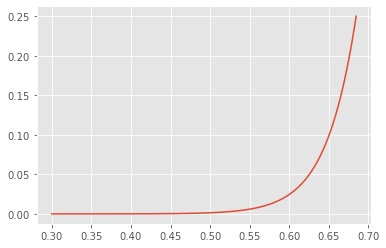

In [5]:
plt.plot(tensao_diodo,corrente_diodo)

In [6]:
#Fatiar o vetores de forma a pegar apenas o ultimo oitavo com a função array_split.
#Detalhe: Em python os índices dos vetores começam em zero. Por isso, o índice 7 foi escolhido para pegar o ultimo oitavo.
tensao_diodo_oitavo = np.array_split(tensao_diodo,8)[7]
corrente_diodo_oitavo = np.array_split(corrente_diodo,8)[7]


In [7]:
#Linearizando a característica no último oitavo.
b, a = np.polynomial.polynomial.polyfit(tensao_diodo_oitavo,corrente_diodo_oitavo,1)
rd = 1/a
Vd0 = -b/a
corrente_diodo_linear = tensao_diodo_oitavo/rd - Vd0/rd;


In [8]:
print(f"Para o modelo linearizado, temos que rd:{rd:.3f} Ohm e Vd0:{Vd0:.3f} V.")

Para o modelo linearizado, temos que rd:0.270 Ohm e Vd0:0.622 V.


In [9]:
#Ajuste da caracteristica exponencial
corrente_diodo_ln = np.log(corrente_diodo)
d, c = np.polynomial.polynomial.polyfit(tensao_diodo,corrente_diodo_ln,1)
eta = 1/(0.026*c)
Is = np.exp(d)

In [10]:
corrente_diodo_exp = Is*np.exp(tensao_diodo/(0.026*eta))

In [22]:
print(f"Para o modelo exponencial, temos que eta:{eta:.3f} V e Is:{Is*10**9:.3f} nV.")


Para o modelo exponencial, temos que eta:1.364 V e Is:1.102 nV.


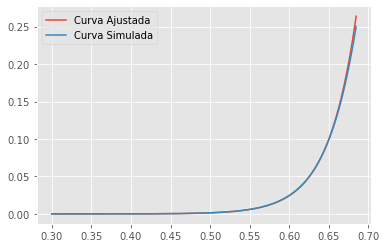

In [11]:
plt.figure(1)
plt.plot(tensao_diodo,corrente_diodo_exp,label='Curva Ajustada')
plt.plot(tensao_diodo,corrente_diodo,label='Curva Simulada')
plt.legend()
#plt.savefig('output1.png')

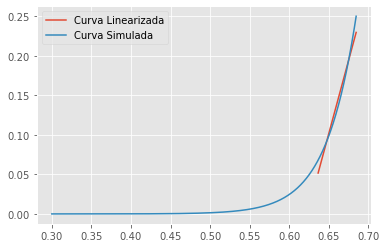

In [12]:
plt.figure(2)
plt.plot(tensao_diodo_oitavo,corrente_diodo_linear,label='Curva Linearizada')
plt.plot(tensao_diodo,corrente_diodo,label='Curva Simulada')
plt.legend()
#plt.savefig('output2.png')

In [13]:
d1,c1 = np.polynomial.polynomial.polyfit([0,1],[3,5],1)


In [21]:
print(f"Reta da forma {c}x + {d}")
print(f"Reta da forma {a}x + {b}")

Reta da forma 28.18767261266894x + -20.6257837270474
Reta da forma 3.7046998391264574x + -2.305957432644108


#### Para fins de comparação vou analisar os valores do código fornecido na aula

In [15]:
tensao_diodo_ex  = pd.read_csv('vdt.txt',sep='\t')['v']
corrente_diodo_ex = pd.read_csv('idt.txt',sep='\t')['i']

In [16]:
b_ex, a_ex = np.polynomial.polynomial.polyfit(tensao_diodo_ex,corrente_diodo_ex,1)
rd_ex = 1/a_ex
Vd0_ex = -b_ex/a_ex
#Corresponde aos valores esperados

In [17]:
print(f"Para o modelo linearizado temos que rd:{rd_ex:.3f} Ohm e Vd0:{Vd0_ex:.3f} V.")

Para o modelo linearizado temos que rd:1.275 Ohm e Vd0:0.726 V.


In [18]:
#Ajuste da caracteristica exponencial
corrente_diodo_ln_ex = np.log(corrente_diodo_ex)
d_ex, c_ex = np.polynomial.polynomial.polyfit(tensao_diodo_ex,corrente_diodo_ln_ex,1)
eta_ex = 1/(0.026*c_ex)
Is_ex = np.exp(d_ex)
corrente_diodo_exp_ex = Is_ex*np.exp(tensao_diodo_ex/(0.026*eta_ex))

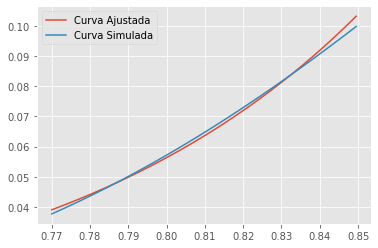

In [19]:
plt.figure(3)
plt.plot(tensao_diodo_ex,corrente_diodo_exp_ex,label='Curva Ajustada')
plt.plot(tensao_diodo_ex,corrente_diodo_ex,label='Curva Simulada')
plt.legend()
plt.savefig('output3.png')